# Primer punto 

Implemente un método que retorne la subsecuencia común más larga (SCL) apartir de la matriz C construida por el algoritmo de PD que calcula la longitud de la SCL.


In [1]:
import math
import numpy as np
import pylab as pl
import random as rnd
%matplotlib inline

In [2]:
def SCL(X , Y):
   
    q = len(X)
    w = len(Y)
    t = [[None]*(w+1) for i in xrange(q+1)]
 
    for i in range(q+1):
        for j in range(w+1):
            if i == 0 or j == 0 :
                t[i][j] = 0
            elif X[i-1] == Y[j-1]:
                t[i][j] = t[i-1][j-1]+1
            else:
                t[i][j] = max(t[i-1][j] , t[i][j-1])
    return t[q][w]

In [5]:
X = "buenas"
Y = "tardes"
print SCL(X, Y)

2


# Segundo Punto

Para el problema del corte de la barilla (Notebook)

# 1. Implemente un método para determinar los cortes que se deben realizar a partir de la solución de PD que encuentra el valor de la solución óptima.

In [56]:
import time
import random as rnd

In [57]:
def cut_rodR(p, n):
    if n==0:
        return 0
    q = float('-inf')
    for i in range(n):
        #print i
        q = max(q, p[i] + cut_rodR(p, n-1-i))
    return q

In [58]:
p = [1,5,8,9,10,17,17,20,24,30]
sol = cut_rodR(p,8)
print (sol)

22


In [59]:
def time_analysis_cut_rodR(n):
    results = []
    for i in range(n):
        t_inicial=time.clock()
        cut_rodR(p, i)
        t_final= time.clock()
        results.append(t_final-t_inicial)
    return results

In [60]:
print (time_analysis_cut_rodR(8))

[2.2807253117207438e-06, 1.0263264130117022e-05, 7.982538818396279e-06, 1.3684352325071814e-05, 2.5087978883675532e-05, 4.618468869921344e-05, 0.00011745735605472873, 0.0001961423811280838]


# Implementación de arriba hacia abajo con memorización 

In [61]:
def memo_cut_rodTD(p, n):
    r = [-1] * (n+1)
    return memo_cut_rodTD_aux(p,n,r)

In [62]:
def memo_cut_rodTD_aux(p,n,r):
    if r[n] >= 0:
        return r[n]
    if n == 0:
        q = 0
    else:
        q = float('-inf')
        for i in range(1,n+1):
            q = max(q, p[i-1]+memo_cut_rodTD_aux(p,n-i,r))
    r[n]=q
    return q

In [63]:
sol = memo_cut_rodTD(p,8)
print (sol)

22


In [64]:
import time
import random as rnd
def time_analysis_cut_rodTD(n):
    results = []
    for i in range(n):
        t_inicial=time.clock()
        memo_cut_rodTD(p, i)
        t_final= time.clock()
        results.append(t_final-t_inicial)
    return results

In [65]:
print (time_analysis_cut_rodTD(8))

[1.0833445458047208e-05, 2.3377434899884975e-05, 1.197380811390758e-05, 1.5965077409418882e-05, 2.622834176690958e-05, 3.021961106242088e-05, 3.3640699030002e-05, 3.934251253667753e-05]


# Implementación abajo hacia arriba con memorización

In [141]:
def memo_cut_rodBU(p,n):
    r = [0] * (n+1)
    r[0] = 0
    for j in range(1,n+1):
        q = float('-inf')
        for i in range(1,j+1):            
            q = max(q, p[i-1]+r[j-i])
        r[j] = q
    return r[n]

In [142]:
sol = memo_cut_rodBU(p,8)
print (sol)

22


In [143]:
import time
import random as rnd
def time_analysis_cut_rodBU(n):
    results = []
    for i in range(n):
        t_inicial=time.clock()
        memo_cut_rodBU(p, i)
        t_final= time.clock()
        results.append(t_final-t_inicial)
    return results

In [144]:
print (time_analysis_cut_rodBU(8))


[6.271994607232045e-06, 1.140362701335107e-05, 9.122901246882975e-06, 1.140362701335107e-05, 1.82458029485133e-05, 1.9386165604373673e-05, 2.3377434899884975e-05, 2.8509066851256648e-05]


# Cortes que se deben realizar para Implementación abajo hacia arriba con memorización

In [145]:
def mostrar_secuencia(lista,n,contador):
    aux=lista[n-1]
    aux2=[]
    if(0 in aux):
        return aux;
    else:
        aux2.insert(contador,mostrar_secuencia(lista,int(aux[0]),contador))
        contador=contador+1
        aux2.insert(contador,mostrar_secuencia(lista,int(aux[1]),contador))
        
        posva=0
        listaF=[]
        for i in range(0,len(aux2)):
            for j in range(0,2):
                if(aux2[i][j]!=0):
                    listaF.insert(posva,int(aux2[i][j]))
                    posva=posva+1
        
    return listaF


In [146]:
def memo_cut_rodBU(p,n):
    r = [0] * (n+1)
    r[0] = 0
    lista=[]
    
    for j in range(1,n+1):
        auxiliar1=0
        auxiliar2=0
        aux=np.zeros(2)
        q = float('-inf')
        for i in range(1,j+1): 
            if(q<p[i-1]+r[j-i]):
                auxiliar1=i
                auxiliar2=j-i
            
            
            q = max(q, p[i-1]+r[j-i])
            
            
        r[j] = q
        aux[0]=int(auxiliar1)
        aux[1]=int(auxiliar2)
        
        lista.insert(j,aux)
    aux3=mostrar_secuencia(lista,n,0);
    print(aux3)
    
    return r[n]

In [147]:
sol = memo_cut_rodBU(p,8)
print (sol)

[2, 6]
22


# Análisis del tiempo

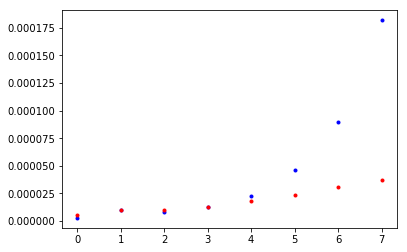

In [151]:
pl.clf()
x = np.arange(8)
y = np.array(time_analysis_cut_rodR(8))  #arriba hacia abajo
pl.plot(x, y, 'k.',color='blue')
x = np.arange(8)
y = np.array(time_analysis_cut_rodTD(8)) #abajo hacia arriba 
pl.plot(x, y, 'k.',color='red')


# Tercer Punto

Implemente, describa y analice un algoritmo de PD para calcular la distancia de edición entre dos cadenas. (Cormen, problem 15-5)

In [169]:
def minim(c,i,j,tarifa,nPuertos):
    k=0
    aux=j
    for k in range(i+1,nPuertos):
        aux=min(aux,tarifa[i,k]+c[k][j])
    return aux


In [170]:
def costs(ports,price):
    c=np.zeros((ports,ports))
    diagonal= ports
    for diagonal in range (1, ports-1):
        for i in range(1,ports-diagonal):
            num=int(i+diagonal);
            c[i][num]= minim(c,i,i+diagonal,price,ports)
    return c

In [171]:
price= np.matrix('0 5 6 3 15;0 0 5 6 7;0 0 0 10 15;0 0 0 0 12; 0 0 0 0 0 ')
print (price)
c=costs(5,price)
print (c)

[[ 0  5  6  3 15]
 [ 0  0  5  6  7]
 [ 0  0  0 10 15]
 [ 0  0  0  0 12]
 [ 0  0  0  0  0]]
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  2.  3.  4.]
 [ 0.  0.  0.  3.  4.]
 [ 0.  0.  0.  0.  4.]
 [ 0.  0.  0.  0.  0.]]


# Cuarto Punto

En el rio atrato hay n embarcaderos, en cada uno de ellos se puede alquilar un bote para realizar un viaje rio abajo a otro embarcadero. Existe una tabla de tarifas que indica el costo del viaje del embarcadero i al j, para i, j = 1,2,...,n  (i<j), puede pasar que un viaje de i a j sea más caro que una serie de viajes sucesivos intermedios, no hay un costo asociado a cambiar de bote en algún embarcadero. El problema consiste en diseñar un algoritmo de PD que determine el costo mínimo para cada par de puntos i,j.

In [172]:
R = 3
C = 3
 
def minCost(cost, m, n):
 
    tc = [[0 for x in range(C)] for x in range(R)]
    tc[0][0] = cost[0][0]
 
    for i in range(1, m+1):
        tc[i][0] = tc[i-1][0] + cost[i][0]
    y
    for j in range(1, n+1):
        tc[0][j] = tc[0][j-1] + cost[0][j]
  
    for i in range(1, m+1):
        for j in range(1, n+1):
            tc[i][j] = min(tc[i-1][j-1], tc[i-1][j], tc[i][j-1]) + cost[i][j]
 
    return tc[m][n]
 

In [173]:
cost = [[1, 2, 3],
        [4, 8, 2],
        [1, 5, 3]]
print(minCost(cost, 2, 2))

8
